# Columbia Admitted Patients Forecast

In [2]:
using COVIDResourceAllocation: forecast

In [3]:
using DataFrames, CSV
using Dates
using Gadfly

In [4]:
start_date = Date(2020, 4, 12)
end_date = Date(2020, 7, 1)
states = ["CT", "MD", "NY"];

In [5]:
forecast_admitted_columbia = forecast(
    states, start_date, end_date,
    level=:state,
    source=:columbia,
    forecast_type=:admitted,
    patient_type=:regular,
    bound_type=:mean,
);
forecast_admitted_columbia_lb = forecast(
    states, start_date, end_date,
    level=:state,
    source=:columbia,
    forecast_type=:admitted,
    patient_type=:regular,
    bound_type=:lb,
);
forecast_admitted_columbia_ub = forecast(
    states, start_date, end_date,
    level=:state,
    source=:columbia,
    forecast_type=:admitted,
    patient_type=:regular,
    bound_type=:ub,
);

In [6]:
forecast_admitted_columbia_total = sum(forecast_admitted_columbia, dims=1)[:]
forecast_admitted_columbia_total_lb = sum(forecast_admitted_columbia_lb, dims=1)[:];
forecast_admitted_columbia_total_ub = sum(forecast_admitted_columbia_ub, dims=1)[:];

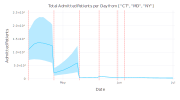

In [7]:
Gadfly.plot(
    x=start_date:Day(1):end_date,
    y=forecast_admitted_columbia_total,
    ymin=forecast_admitted_columbia_total_lb,
    ymax=forecast_admitted_columbia_total_ub,
    Geom.line, Geom.ribbon,
    xintercept=[Date(2020, 4, 12), Date(2020, 4, 26), Date(2020, 5, 10), Date(2020, 5, 21), Date(2020, 5, 31), Date(2020, 6, 4)],
    Geom.vline(color=["red"], style=[[1mm,1mm]]),
    Guide.title("Total Admitted Patients per Day from $(states)"), Guide.xlabel("Date"), Guide.ylabel("Admitted Patients")
) |> SVG(18cm, 10cm)

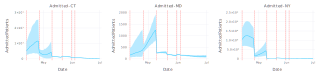

In [8]:
plots = [Gadfly.plot(
    x=start_date:Day(1):end_date,
    y=forecast_admitted_columbia[i,:],
    ymin=forecast_admitted_columbia_lb[i,:],
    ymax=forecast_admitted_columbia_ub[i,:],
    Geom.line, Geom.ribbon,
    xintercept=[Date(2020, 4, 12), Date(2020, 4, 26), Date(2020, 5, 10), Date(2020, 5, 21), Date(2020, 5, 31), Date(2020, 6, 4)],
    Geom.vline(color=["red"], style=[[1mm,1mm]]),
    Guide.title("Admitted - $(states[i])"), Guide.xlabel("Date"), Guide.ylabel("Admitted Patients")
) for i in 1:3]
hstack(plots) |> SVG(32cm, 8cm)

In [9]:
start_date_gt = Date(2020, 4, 12)
end_date_gt = Date(2020, 6, 5)
states_gt = ["MD", "NY"];

In [10]:
patients_admitted_gt = forecast(
    states_gt, start_date_gt, end_date_gt,
    level=:state,
    source=:covidtracking,
    forecast_type=:admitted,
    patient_type=:regular,
    bound_type=:mean,
);

forecast_admitted_columbia = forecast(
    states_gt, start_date_gt, end_date_gt,
    level=:state,
    source=:columbia,
    forecast_type=:admitted,
    patient_type=:regular,
    bound_type=:mean,
);
forecast_admitted_columbia_lb = forecast(
    states_gt, start_date_gt, end_date_gt,
    level=:state,
    source=:columbia,
    forecast_type=:admitted,
    patient_type=:regular,
    bound_type=:lb,
);
forecast_admitted_columbia_ub = forecast(
    states_gt, start_date_gt, end_date_gt,
    level=:state,
    source=:columbia,
    forecast_type=:admitted,
    patient_type=:regular,
    bound_type=:ub,
);

In [11]:
patients_admitted_gt_total = sum(patients_admitted_gt, dims=1)[:];
forecast_admitted_columbia_total = sum(forecast_admitted_columbia, dims=1)[:];
forecast_admitted_columbia_total_lb = sum(forecast_admitted_columbia_lb, dims=1)[:];
forecast_admitted_columbia_total_ub = sum(forecast_admitted_columbia_ub, dims=1)[:];

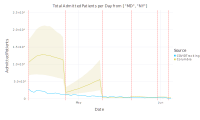

In [12]:
colors = Scale.default_discrete_colors(2)

l1 = layer(x=start_date:Day(1):end_date_gt, y=patients_admitted_gt_total, Geom.line, Theme(default_color=colors[1], alphas=[0.4]))
l2 = layer(
    x=start_date:Day(1):end_date_gt,
    y=forecast_admitted_columbia_total,
    ymin=forecast_admitted_columbia_total_lb,
    ymax=forecast_admitted_columbia_total_ub,
    Geom.line, Geom.ribbon,
    Theme(default_color=colors[2], alphas=[0.4]),
)

Gadfly.plot(
    l1, l2,
    Guide.manual_color_key("Source", ["COVIDTracking", "Columbia"], [colors[1], colors[2]]),
    xintercept=[Date(2020, 4, 12), Date(2020, 4, 26), Date(2020, 5, 10), Date(2020, 5, 21), Date(2020, 5, 31), Date(2020, 6, 4)],
    Geom.vline(color=["red"], style=[[1mm,1mm]]),
    Guide.title("Total Admitted Patients per Day from $(states_gt)"), Guide.xlabel("Date"), Guide.ylabel("Admitted Patients"),
) |> SVG(20cm, 12cm)